## Assignment Content

<p>Acquire power data from this source for at least 10 days and not more than 40 days. The website limits the window size, so you will need to download multiple files. Load the data into a Jupyter Notebook. Combine the multiple input files to create a single dataframe.</p>

<li>Create two bar graphs of the power consumption per hour.</li>

<li>One bar graph has 24 bars; each bar is the average across all days for that hour</li>​
<li>one bar graph has 24*(number of days) bars. Your choice of average or sum for each hour. Label the y-axis appropriately.</li>
Submit the .ipynb file containing the analysis and the generated pictures.​

Include the assignment description in a markdown cell at the top of your notebook.

In [58]:
# importing libraries
import csv
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import time

In [48]:
df1 = pd.read_csv('RollingSystemDemand_20211013_1448.csv',index_col=False,
                         skiprows=1,
                         skipfooter=1,
                         engine='python',
                         header=None)
df1.columns=['VD','time of measurement','value']

df2 = pd.read_csv('RollingSystemDemand_20211013_1449.csv', index_col=False,
                         skiprows=1,
                         skipfooter=1,
                         engine='python',
                         header=None)
df3 = pd.read_csv('RollingSystemDemand_20211013_1450.csv', index_col=False,
                         skiprows=1,
                         skipfooter=1,
                         engine='python',
                         header=None)
df4 = pd.read_csv('RollingSystemDemand_20211013_14581.csv', index_col=False,
                         skiprows=1,
                         skipfooter=1,
                         engine='python',
                         header=None)
df5 = pd.read_csv('RollingSystemDemand_20211013_14591.csv', index_col=False,
                         skiprows=1,
                         skipfooter=1,
                         engine='python',
                         header=None) 
df6 = pd.read_csv('RollingSystemDemand_20211013_1458.csv', index_col=False,
                         skiprows=1,
                         skipfooter=1,
                         engine='python',
                         header=None)
df7 = pd.read_csv('RollingSystemDemand_20211013_1459.csv', index_col=False,
                         skiprows=1,
                         skipfooter=1,
                         engine='python',
                         header=None)
df2.columns=['VD','time of measurement','value']
df3.columns=['VD','time of measurement','value']
df4.columns=['VD','time of measurement','value']
df5.columns=['VD','time of measurement','value']
df6.columns=['VD','time of measurement','value']
df7.columns=['VD','time of measurement','value']


In [32]:
df1.isna().sum()
df1.dropna(how='any', inplace=True)

In [49]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   VD                   1728 non-null   object
 1   time of measurement  1728 non-null   int64 
 2   value                1728 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 40.6+ KB


In [51]:
df1.head()

,VD,time of measurement,value
0,VD,20200201000000,25283
1,VD,20200201000500,25636
2,VD,20200201001000,25744
3,VD,20200201001500,25733
4,VD,20200201002000,25606


In [52]:
df2.head()

,VD,time of measurement,value
0,VD,20200207000000,28209
1,VD,20200207000500,28372
2,VD,20200207001000,28368
3,VD,20200207001500,28347
4,VD,20200207002000,28349


In [53]:
df3.head()

,VD,time of measurement,value
0,VD,20200214000000,29844
1,VD,20200214000500,29761
2,VD,20200214001000,29723
3,VD,20200214001500,29656
4,VD,20200214002000,29575


In [54]:
df4.head()

,VD,time of measurement,value
0,VD,20200226000000,27342
1,VD,20200226000500,27469
2,VD,20200226001000,27458
3,VD,20200226001500,27476
4,VD,20200226002000,27504


In [55]:
# Appending data frames
df=df1.append(df2).append(df3).append(df4).append(df5).append(df6).append(df7)


In [56]:
df

,VD,time of measurement,value
0,VD,20200201000000,25283
1,VD,20200201000500,25636
2,VD,20200201001000,25744
3,VD,20200201001500,25733
4,VD,20200201002000,25606
...,...,...,...
1702,VD,20200307233500,23838
1703,VD,20200307234000,23706
1704,VD,20200307234500,23615
1705,VD,20200307235000,23509


In [57]:
df['time of measurement']=df['time of measurement'].apply(str)

In [59]:
df['time of measurement']=pd.to_datetime(df['time of measurement'].astype(str),format='%Y%m%d%H%M%S')

In [60]:
df.head()

,VD,time of measurement,value
0,VD,2020-02-01 00:00:00,25283
1,VD,2020-02-01 00:05:00,25636
2,VD,2020-02-01 00:10:00,25744
3,VD,2020-02-01 00:15:00,25733
4,VD,2020-02-01 00:20:00,25606


In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11474 entries, 0 to 1706
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   VD                   11474 non-null  object        
 1   time of measurement  11474 non-null  datetime64[ns]
 2   value                11474 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 358.6+ KB


In [62]:
#extracting the hour from the date
df['time of measurement'].dt.hour

0        0
1        0
2        0
3        0
4        0
        ..
1702    23
1703    23
1704    23
1705    23
1706    23
Name: time of measurement, Length: 11474, dtype: int64

In [64]:
df['Hour']=df['time of measurement'].dt.hour
df_1=df.groupby(['Hour'])['value'].mean()



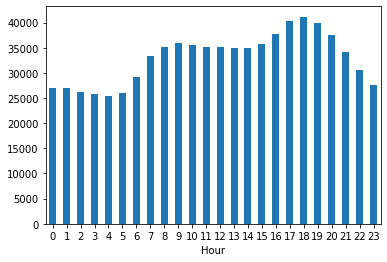

In [65]:
bx = df_1.plot.bar(x='Hour', y='value', rot=0)

In [66]:
df['Date']=df['time of measurement'].dt.date
df


,VD,time of measurement,value,Hour,Date
0,VD,2020-02-01 00:00:00,25283,0,2020-02-01
1,VD,2020-02-01 00:05:00,25636,0,2020-02-01
2,VD,2020-02-01 00:10:00,25744,0,2020-02-01
3,VD,2020-02-01 00:15:00,25733,0,2020-02-01
4,VD,2020-02-01 00:20:00,25606,0,2020-02-01
...,...,...,...,...,...
1702,VD,2020-03-07 23:35:00,23838,23,2020-03-07
1703,VD,2020-03-07 23:40:00,23706,23,2020-03-07
1704,VD,2020-03-07 23:45:00,23615,23,2020-03-07
1705,VD,2020-03-07 23:50:00,23509,23,2020-03-07


In [69]:
df_2 = df.groupby(['Date'])['value'].mean()
df_2

Date
2020-02-01    29205.565972
2020-02-02    29735.076389
2020-02-03    33118.194444
2020-02-04    34987.371528
2020-02-05    36823.986111
2020-02-06    36305.434028
2020-02-07    34112.208333
2020-02-08    28704.229167
2020-02-09    29704.701389
2020-02-10    33775.069444
2020-02-11    34042.666667
2020-02-12    35200.708333
2020-02-13    35644.501901
2020-02-14    35024.979167
2020-02-15    30175.236111
2020-02-16    29029.437500
2020-02-17    32524.038194
2020-02-18    33537.635417
2020-02-19    34913.024306
2020-02-20    33436.517361
2020-02-21    32877.343750
2020-02-22    28767.388889
2020-02-23    29509.506944
2020-02-24    34041.173611
2020-02-25    34630.628472
2020-02-26    35361.152778
2020-02-27    35902.406250
2020-02-28    35767.704861
2020-02-29    29371.951389
2020-03-01    29052.017361
2020-03-02    34122.618056
2020-03-03    35512.895833
2020-03-04    37519.048611
2020-03-05    37857.898876
2020-03-06    34953.128472
2020-03-07    29642.847222
2020-03-08    27907.201

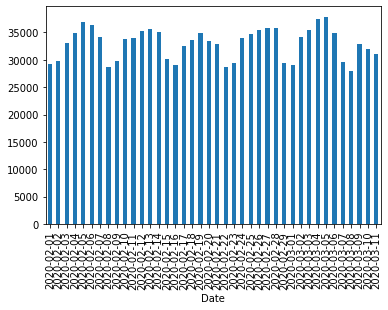

In [71]:
cx = df_2.plot.bar(x='Dour', y='value', rot=90)